In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from collections import Counter
from pandas.api.types import is_numeric_dtype

import warnings
warnings.filterwarnings("ignore")

In [3]:
books = pd.read_feather("Finish/booksDB.feather")
books.drop(columns=["index"], inplace=True)

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360655 entries, 0 to 2360654
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   isbn                  object 
 1   average_rating        float64
 2   description           object 
 3   authors               object 
 4   publisher             object 
 5   isbn13                object 
 6   publication_year      int32  
 7   image_url             object 
 8   book_id               object 
 9   ratings_count         float64
 10  title                 object 
 11  title_without_series  object 
dtypes: float64(2), int32(1), object(9)
memory usage: 207.1+ MB


In [3]:
books

,isbn,average_rating,description,authors,publisher,isbn13,publication_year,image_url,book_id,ratings_count,title,title_without_series
0,0312853122,4.00,,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,9780312853129,1984,https://images.gr-assets.com/books/1310220028m...,5333265,3.0,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,3.23,"Anita Diamant's international bestseller ""The ...","[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,9780743509985,2001,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10.0,Good Harbor,Good Harbor
2,,4.03,Omnibus book club edition containing the Ladie...,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",,1987,https://images.gr-assets.com/books/1304100136m...,7327624,140.0,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3.49,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]",Atria Books,9780743294294,2009,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184.0,Best Friends Forever,Best Friends Forever
4,0850308712,3.40,,"[{'author_id': '149918', 'role': ''}]",,9780850308716,100,https://images.gr-assets.com/books/1413219371m...,287140,15.0,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
...,...,...,...,...,...,...,...,...,...,...,...,...
2360650,0563553014,4.05,"The award-winning story of Britain, from the a...","[{'author_id': '4015', 'role': ''}, {'author_i...",BBC Audiobooks,9780563553014,1999,https://images.gr-assets.com/books/1494763458m...,3084038,12.0,"This Sceptred Isle, Vol. 10: The Age of Victor...","This Sceptred Isle, Vol. 10: The Age of Victor..."
2360651,178092870X,3.50,Sir Arthur Conan Doyle is brought back to life...,"[{'author_id': '2448', 'role': ''}, {'author_i...",MX Publishing,9781780928708,2015,https://images.gr-assets.com/books/1440592011m...,26168430,6.0,Sherlock Holmes and the July Crisis,Sherlock Holmes and the July Crisis
2360652,0765197456,4.00,"Gathers poems by William Blake, Emily Bronte, ...","[{'author_id': '82312', 'role': 'Editor'}]",Smithmark Publishers,9780765197450,1996,https://s.gr-assets.com/assets/nophoto/book/11...,2342551,36.0,The Children's Classic Poetry Collection,The Children's Classic Poetry Collection
2360653,162378140X,4.37,"Volume One contains: ""Claimed,"" ""Tainted,"" and...","[{'author_id': '7789809', 'role': ''}]",Guerrilla Wordfare,9781623781408,2014,https://images.gr-assets.com/books/1398621236m...,22017381,70.0,"101 Nights: Volume One (101 Nights, #1-3)","101 Nights: Volume One (101 Nights, #1-3)"


In [4]:
print(sorted(list(books['publication_year'].unique())))

[100, 1000, 1005, 1007, 1012, 1013, 1014, 1015, 1016, 1017, 1025, 1065, 1070, 1080, 1084, 1093, 1197, 1212, 1213, 1214, 1305, 1306, 1321, 1325, 1327, 1328, 1330, 1331, 1333, 1335, 1337, 1340, 1342, 1343, 1344, 1345, 1346, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1400, 1401, 1402, 1403, 1404, 1406, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1416, 1417, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1461, 1466, 1470, 1483, 1485, 1492, 1500, 1505, 1514, 1516, 1520, 1522, 1525, 1529, 1540, 1566, 1593, 1596, 1597, 1599, 1603, 1607, 1609, 1614, 1620, 1622, 1623, 1624, 1638, 1639, 1643, 1645, 1647, 1649, 1650, 1652, 1653, 1654, 1655, 1656, 1657, 1661, 1667, 1668

In [5]:
books_good = books[books['ratings_count'] != 0]
books_good = books[books['publication_year'] > 1600]
books_good = books_good.reset_index(drop = True)
books_good.shape

(1758368, 12)

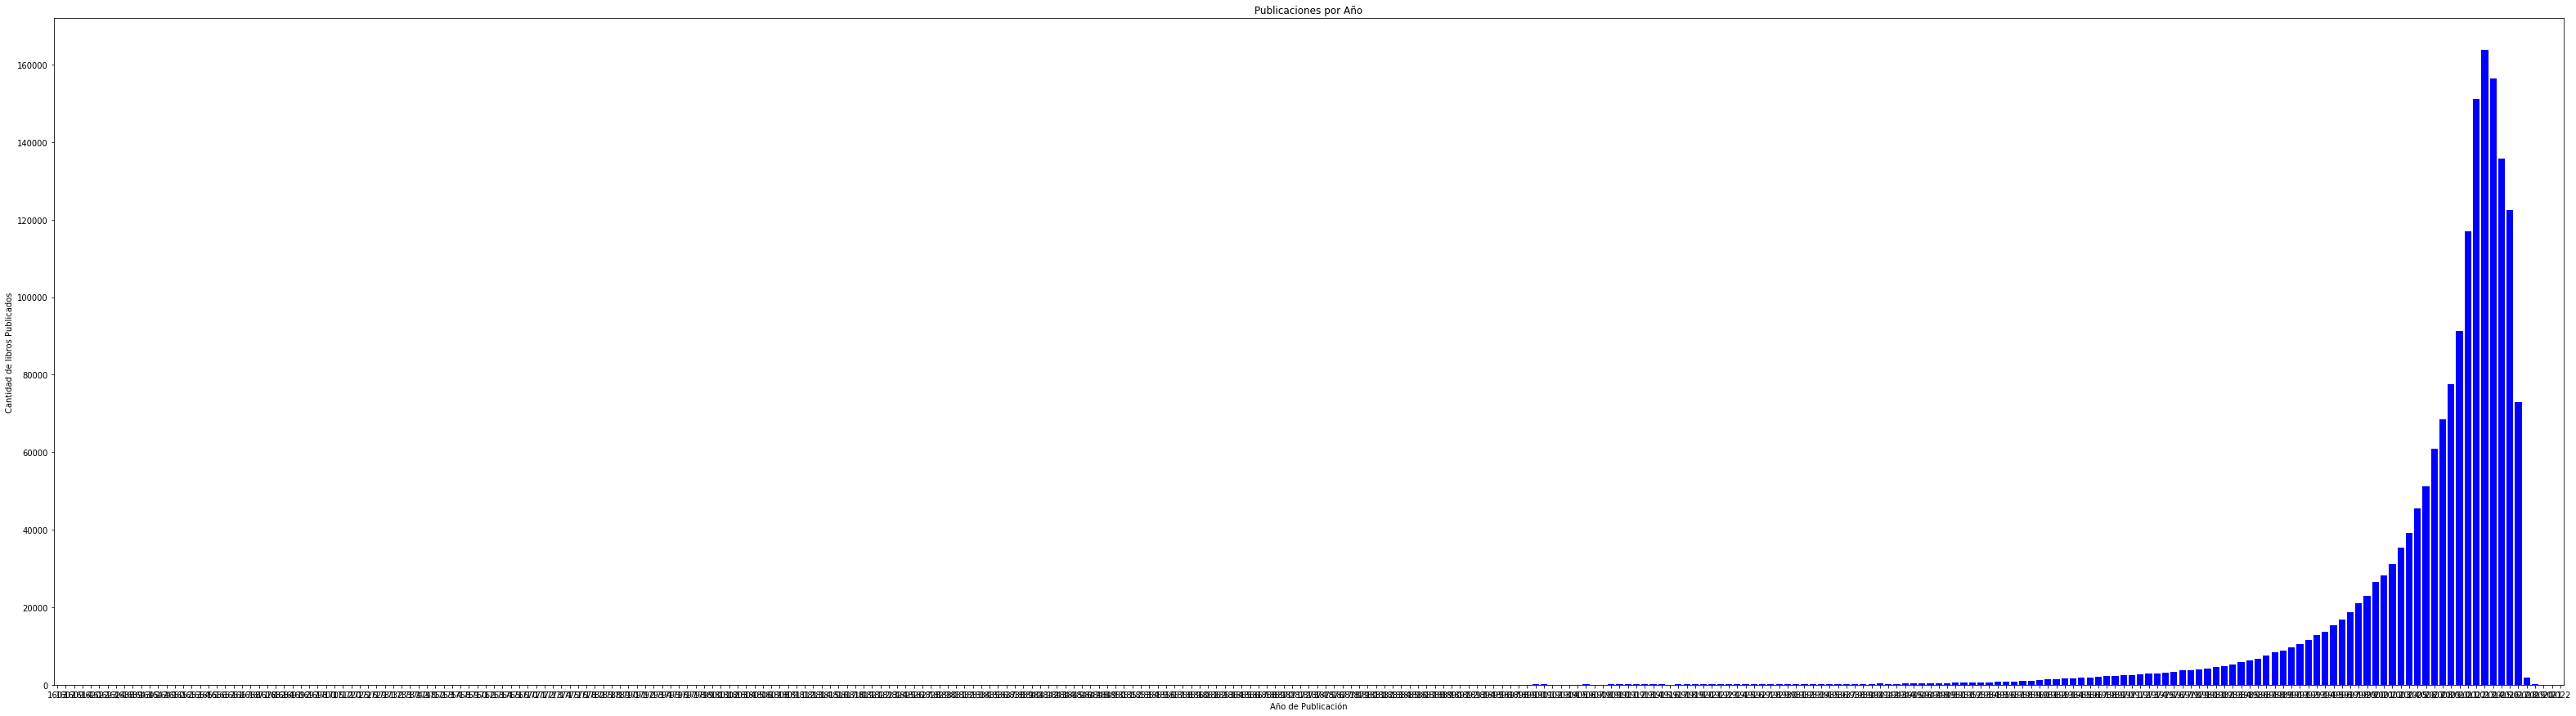

In [6]:
publications = {}
for year in books_good['publication_year']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Cantidad de libros Publicados")
plt.xlabel("Año de Publicación")
plt.title("Publicaciones por Año")
plt.margins(x = 0)
plt.show()

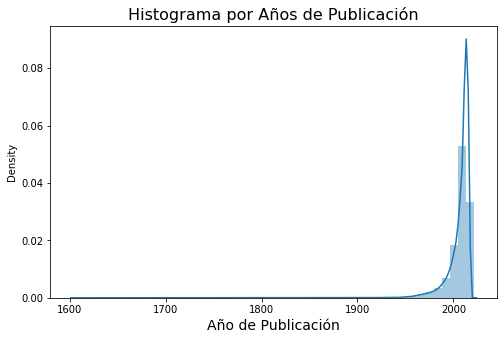

In [7]:
fig=plt.figure(figsize=(8,5))
y1 = books_good[books_good['publication_year'] >= 1600]
y1 = y1[y1['publication_year'] <= 2022]
sns.distplot(y1['publication_year'])
plt.xlabel('Año de Publicación',size=14)
plt.title('Histograma por Años de Publicación',size=16)
plt.show()

In [ ]:
books["publisher"].replace('', 'Other',regex=True,inplace=True)
books

Text(0.5, 1.0, 'Cantidad de Libros por Editorial (Top 15)')

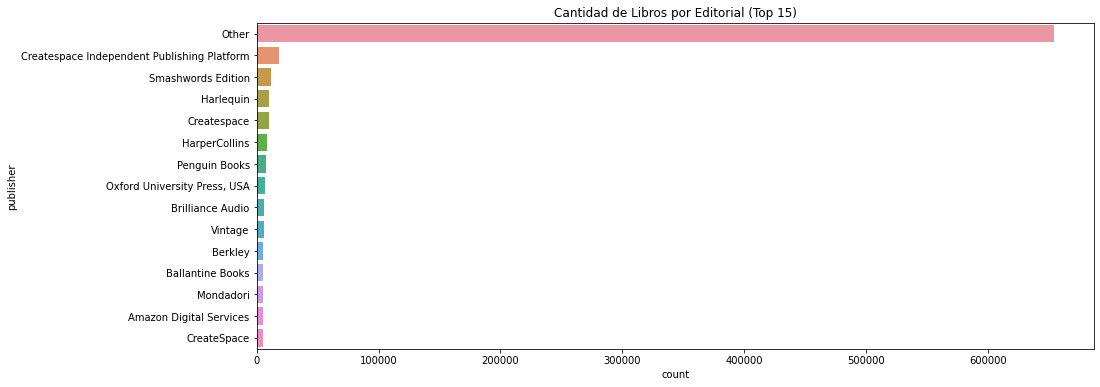

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(y="publisher", data=books,order=books['publisher'].value_counts().index[0:15])
plt.title("Cantidad de Libros por Editorial (Top 15)")

Text(0.5, 1.0, 'Editoriales Válidas')

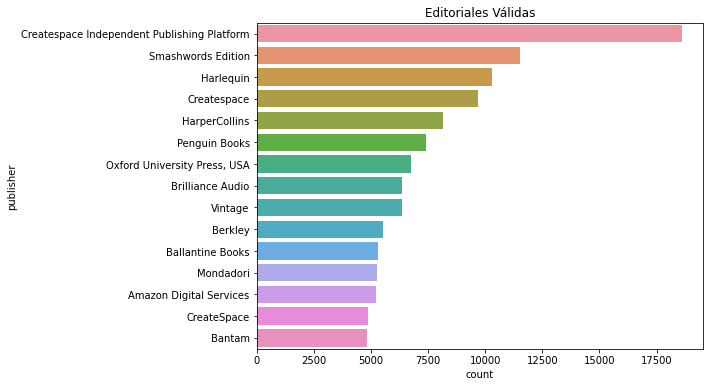

In [13]:
plt.figure(figsize=(8,6))
data = books[books['publisher'] != "Other"]
sns.countplot(y="publisher", data=data,order=data['publisher'].value_counts().index[0:15])
plt.title("Editoriales Válidas")

In [26]:
users = pd.read_feather("Finish/users_interaction.feather")
users.drop(columns=["index"], inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228648342 entries, 0 to 228648341
Data columns (total 5 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int64
 1   book_id      int64
 2   is_read      int64
 3   rating       int64
 4   is_reviewed  int64
dtypes: int64(5)
memory usage: 8.5 GB


Text(0.5, 1.0, 'Ratings Válidos')

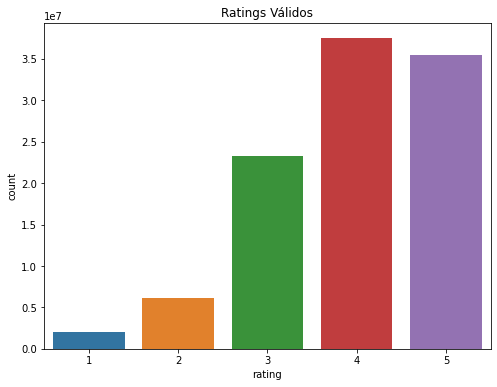

In [29]:
plt.figure(figsize=(8,6))
data = users[users['rating'] != 0]
sns.countplot(x="rating", data=data)
plt.title("Ratings Válidos")

Text(0.5, 1.0, 'Ratings Libros')

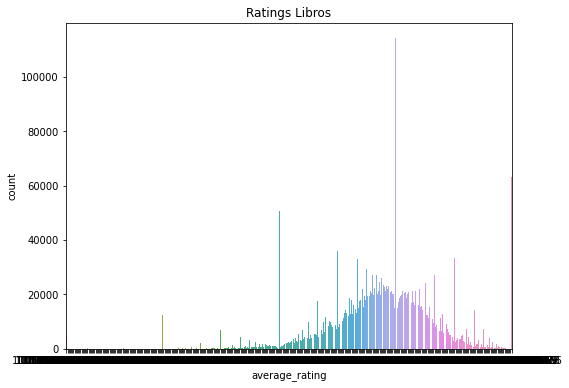

In [30]:
plt.figure(figsize=(8,6))
data = books[books['average_rating'] != 0]
sns.countplot(x="average_rating", data=data)
plt.title("Ratings Libros")

In [4]:
books.sort_values(by="average_rating",ascending=False).head()

,isbn,average_rating,description,authors,publisher,isbn13,publication_year,image_url,book_id,ratings_count,title,title_without_series
1180327,,5.0,,"[{'author_id': '3182018', 'role': ''}]",,9781629210377,100,https://s.gr-assets.com/assets/nophoto/book/11...,22098489,1.0,GetFisk: Pirate Lair,GetFisk: Pirate Lair
289603,,5.0,"Okinawa, Japon, Segunda Guerra Mundial.\nMomok...","[{'author_id': '4869630', 'role': ''}]",Plataforma Neo,,2017,https://images.gr-assets.com/books/1501264053m...,35844897,4.0,El valle oscuro,El valle oscuro
1396544,146855218X,5.0,1-Page-Classics is written by a dimensional ph...,"[{'author_id': '6034568', 'role': ''}]",Authorhouse,9781468552188,2012,https://s.gr-assets.com/assets/nophoto/book/11...,17647550,1.0,1-Page-Classics: A Compendium Including Origin...,1-Page-Classics: A Compendium Including Origin...
1396545,1490756957,5.0,This is a great book to pick up over a cup of ...,"[{'author_id': '6923513', 'role': ''}]",Trafford Publishing,9781490756950,2015,https://images.gr-assets.com/books/1429438655m...,25386854,4.0,Here Comes the Sun-Perhaps?,Here Comes the Sun-Perhaps?
884492,,5.0,James Murray is a young man with a dream -- he...,"[{'author_id': '3101415', 'role': ''}]",,,2015,https://images.gr-assets.com/books/1420323458m...,24282580,1.0,Blackmail at Wrigley Field (The James Murray M...,Blackmail at Wrigley Field (The James Murray M...


In [5]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

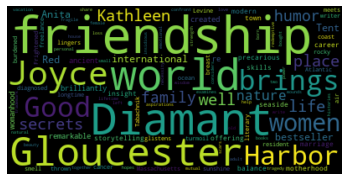

In [6]:
# Start with one review:
text = books.description[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
text = " ".join(review for review in books.description)
print ("There are {} words in the combination of all review.".format(len(text)))


There are 1644677648 words in the combination of all review.


In [8]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()